## **背景描述**
本数据集包含了多个与心力衰竭相关的特征，用于分析和预测患者心力衰竭发作的风险。数据集涵盖了从40岁到95岁不等年龄的患者群体，提供了广泛的生理和生活方式指标，以帮助研究人员和医疗专业人员更好地理解心衰的潜在风险因素。

每条患者记录包含以下关键信息：

1. **年龄（Age）**：记录患者的年龄，心脏病的风险随年龄增长而增加。
2. **贫血（Anaemia）**：贫血可能影响心脏功能，记录患者是否患有贫血。
3. **高血压（High blood pressure）**：高血压是心脏病的主要风险因素之一。
4. **肌酸激酶（Creatinine phosphokinase, CPK）**：血液中的CPK水平可以反映心肌损伤。
5. **糖尿病（Diabetes）**：糖尿病与心脏病风险增加有关。
6. **射血分数（Ejection fraction）**：心脏每次收缩时泵出的血液百分比，是心脏功能的重要指标。
7. **性别（Sex）**：性别可能影响心脏病的风险和表现形式。
8. **血小板（Platelets）**：血小板水平可能与血液凝固和心脏病风险相关。
9. **血清肌酐（Serum creatinine）**：血液中的肌酐水平可以反映肾脏功能，与心脏病风险有关。
10. **血清钠（Serum sodium）**：钠水平的异常可能与心脏疾病相关。
11. **吸烟（Smoking）**：吸烟是心脏病的一个重要可预防风险因素。
12. **时间（Time）**：记录患者的随访期，用于观察长期健康变化。
13. **死亡事件（death event）**：记录患者在随访期间是否发生了死亡事件，作为研究的主要结果指标。

| 字段                  | 解释                             | 测量单位      | 区间             |
|------------------------------|----------------------------------------------------|------------------|--------------------|
| Age                  | 患者的年龄                                          | 年（Years）            | [40,…, 95]         |
| Anaemia              | 是否贫血（红细胞或血红蛋白减少）                                 | 布尔值（Boolean）          | 0, 1                |
| High blood pressure | 患者是否患有高血压                                  | 布尔值（Boolean）          | 0, 1                |
| Creatinine phosphokinase, CPK | 血液中的 CPK （肌酸激酶）水平                                  | 微克/升（mcg/L）            | [23,…, 7861]       |
| Diabetes        | 患者是否患有糖尿病                                  | 布尔值（Boolean）          | 0, 1                |
| Ejection fraction | 每次心脏收缩时离开心脏的血液百分比                  | 百分比（Percentage）       | [14,…, 80]         |
| Sex               | 性别，女性0或男性1                                 | 二进制（Binary）           | 0, 1                |
| Platelets        | 血液中的血小板数量                                  | 千血小板/毫升（kiloplatelets/mL） | [25.01,…, 850.00] |
| Serum creatinine     | 血液中的肌酐水平                                   | 毫克/分升（mg/dL）         | [0.50,…, 9.40]     |
| Serum sodium       | 血液中的钠水平                                     | 毫摩尔/升（mEq/L）         | [114,…, 148]       |
| Smoking              | 患者是否吸烟                                       | 布尔值（Boolean）          | 0, 1                |
| Time                  | 随访期                                            | 天（Days）             | [4,…,285]          |
| DEATH_EVENT  | 患者在随访期间是否死亡                            | 布尔值（Boolean）          | 0, 1                |

## **问题描述**
生存分析
风险因素分析
构建风险评分模型
心衰发作风险预测

### 读取数据

In [1]:
import pandas as pd
import numpy as np
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 评估与清洗数据

### 评估数据整齐程度

In [2]:
cleaned = heart_failure.copy()
cleaned.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
173,50,1,115,0,20,0,189000.0,0.8,139,1,0,146,0
261,62,1,655,0,40,0,283000.0,0.7,133,0,0,233,0
43,72,0,127,1,50,1,218000.0,1.0,134,1,0,33,0
207,85,0,212,0,38,0,186000.0,0.9,136,1,0,187,0
267,56,1,135,1,38,0,133000.0,1.7,140,1,0,244,0


#### 评估数据整齐程度：符合每行是一个观察值，每列是一个变量，每个单元格是一个值原则。

### 评估缺失数据与数据类型

In [3]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


In [4]:
### anaemia、High blood pressure、Diabetes、Sex、Smoking、DEATH_EVENT是分类数据，数据类型应为category。
cleaned['anaemia'] = cleaned['anaemia'].astype('category')
cleaned['high_blood_pressure'] = cleaned['high_blood_pressure'].astype('category')
cleaned['diabetes'] = cleaned['diabetes'].astype('category')
cleaned['sex'] = cleaned['sex'].astype('category')
cleaned['smoking'] = cleaned['smoking'].astype('category')
cleaned['DEATH_EVENT'] = cleaned['DEATH_EVENT'].astype('category')
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    int64   
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(2), int64(5)
memory usage:

### 提取重复数据

In [5]:
cleaned[cleaned.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


### 评估不一致数据

In [6]:
cleaned['anaemia'].value_counts()

anaemia
0    170
1    129
Name: count, dtype: int64

In [7]:
cleaned['diabetes'].value_counts()

diabetes
0    174
1    125
Name: count, dtype: int64

In [8]:
cleaned['high_blood_pressure'].value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

In [9]:
cleaned['sex'].value_counts()

sex
1    194
0    105
Name: count, dtype: int64

In [10]:
cleaned['smoking'].value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

In [11]:
cleaned['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

### 评估无效或错误数据

In [12]:
cleaned.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.836120,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


### 探索数据与数据可视化

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('pastel')

#### 研究数据之间的关系

<function matplotlib.pyplot.show(close=None, block=None)>

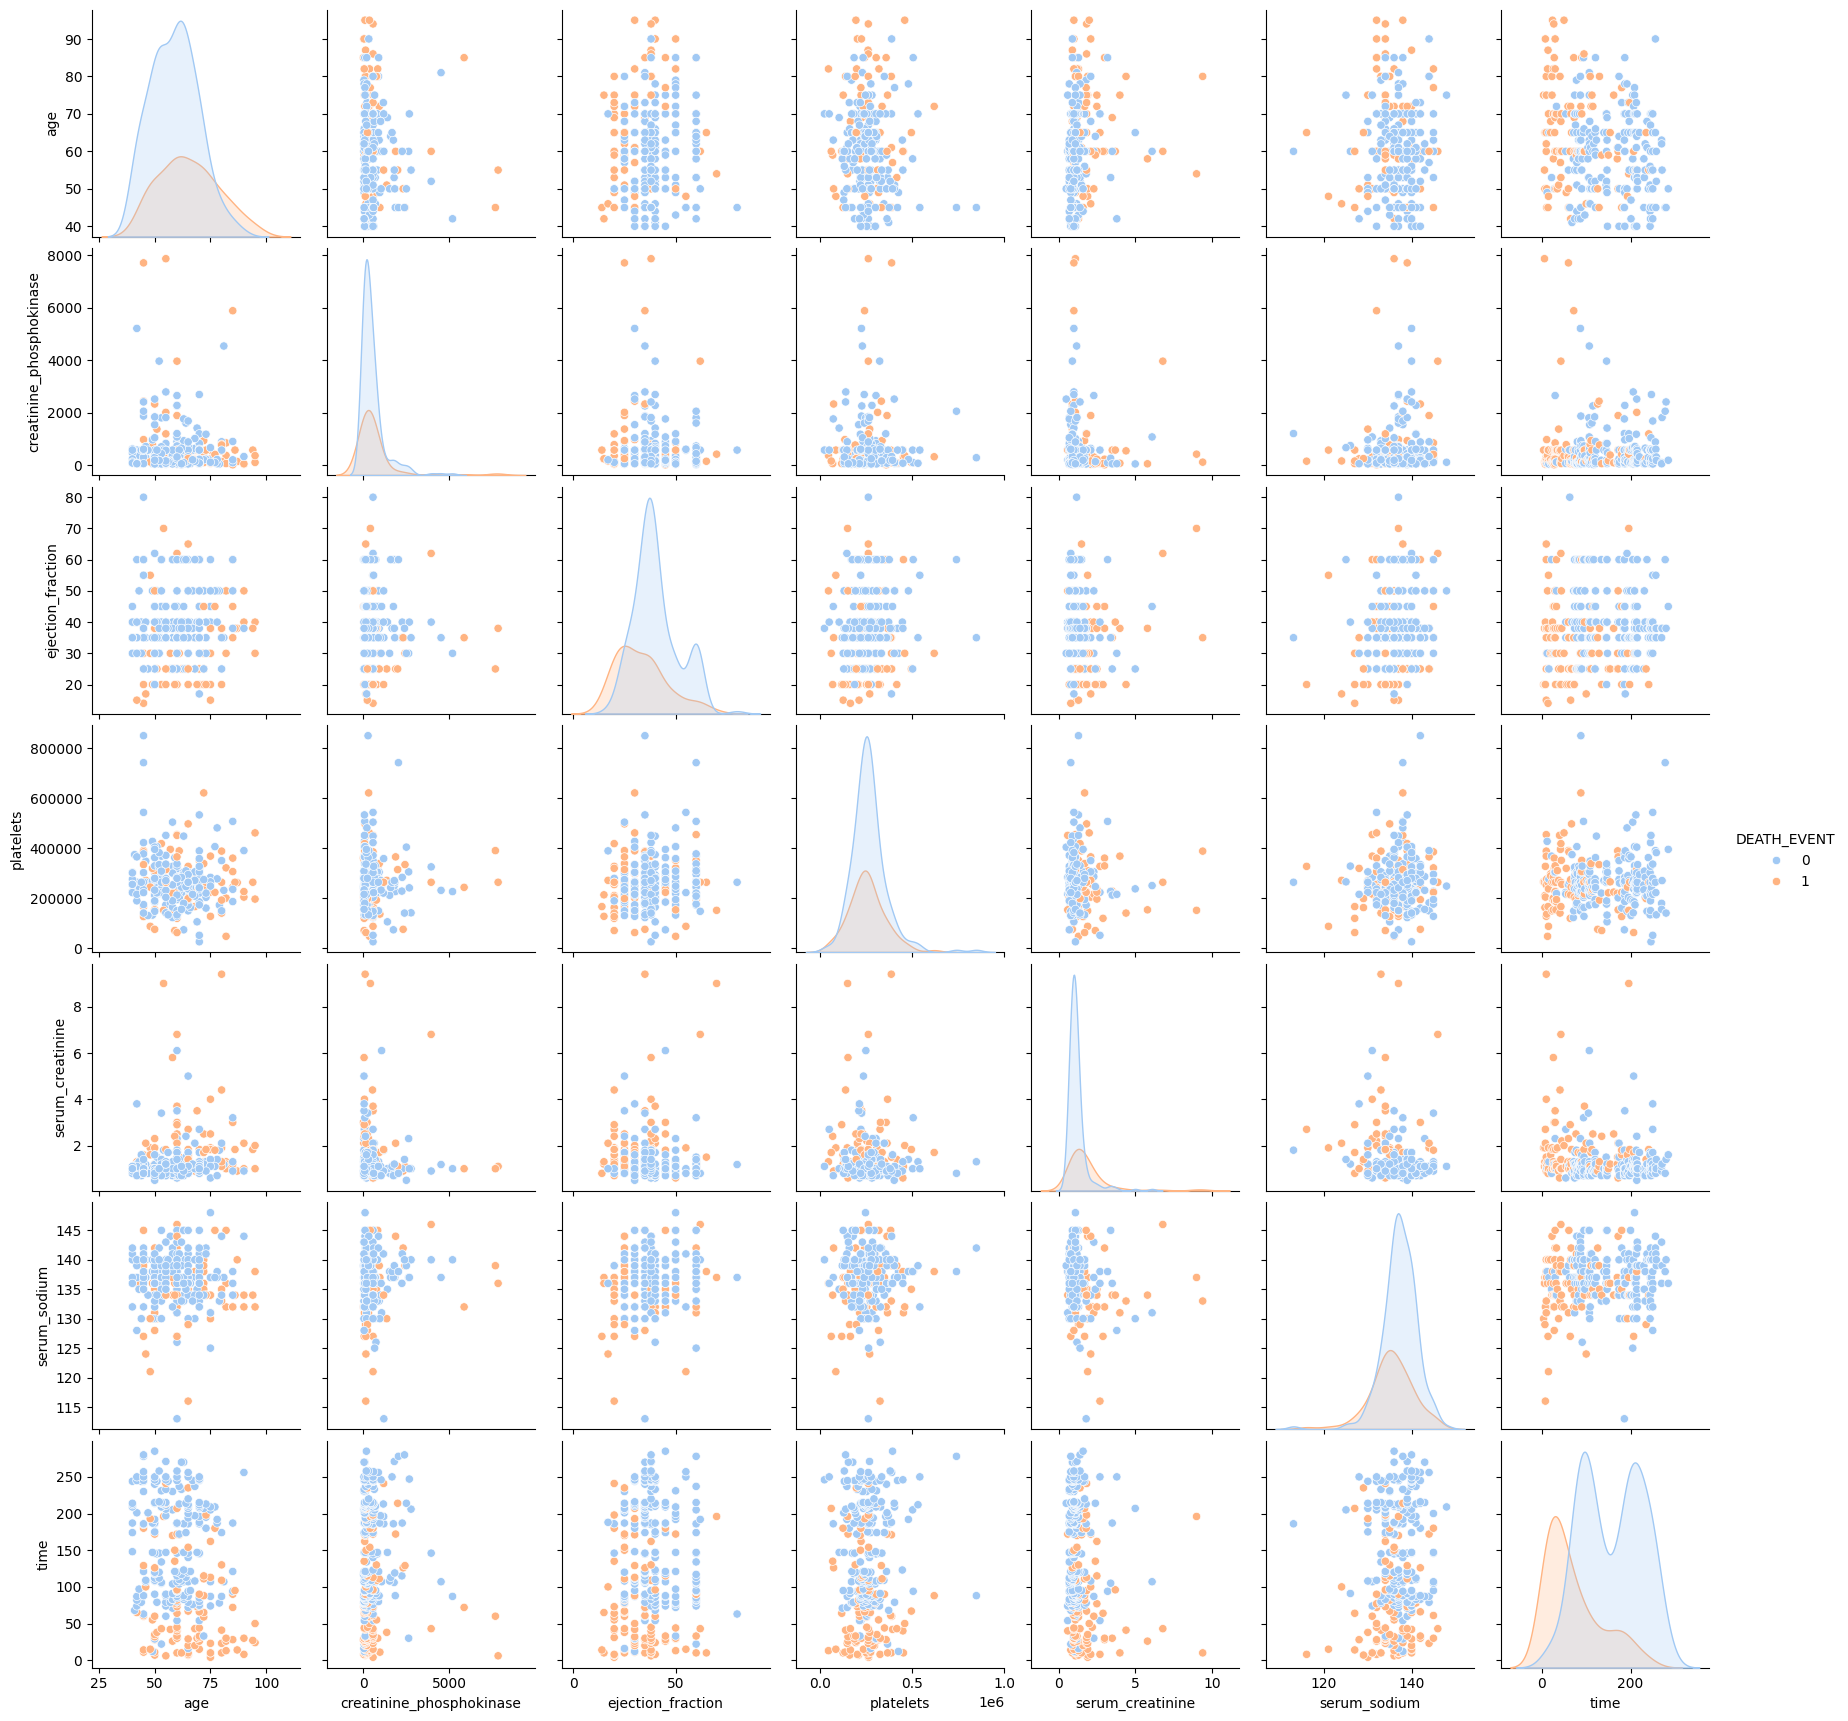

In [14]:
sns.pairplot(cleaned,hue = 'DEATH_EVENT')
plt.show

#### 数值数据分布情况

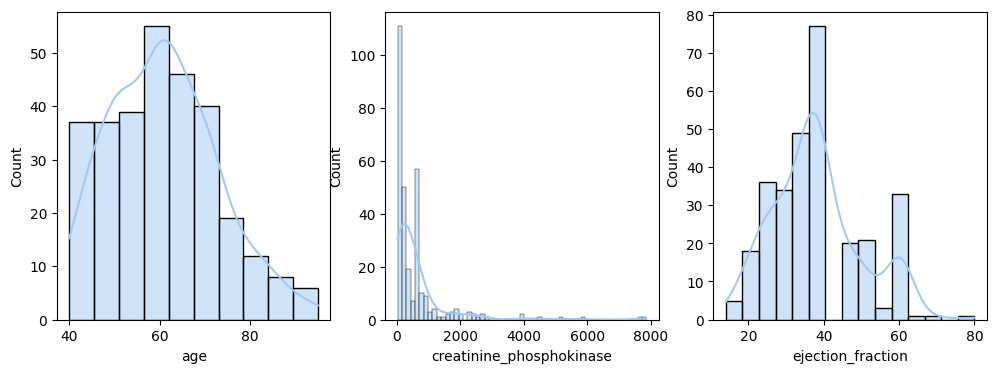

In [15]:
figure,axes = plt.subplots(1,3,figsize = [12,4])
sns.histplot(cleaned,x = 'age',ax = axes[0],kde=True)
sns.histplot(cleaned,x = 'creatinine_phosphokinase',ax = axes[1],kde=True)
sns.histplot(cleaned,x = 'ejection_fraction',ax = axes[2],kde=True)
plt.show()

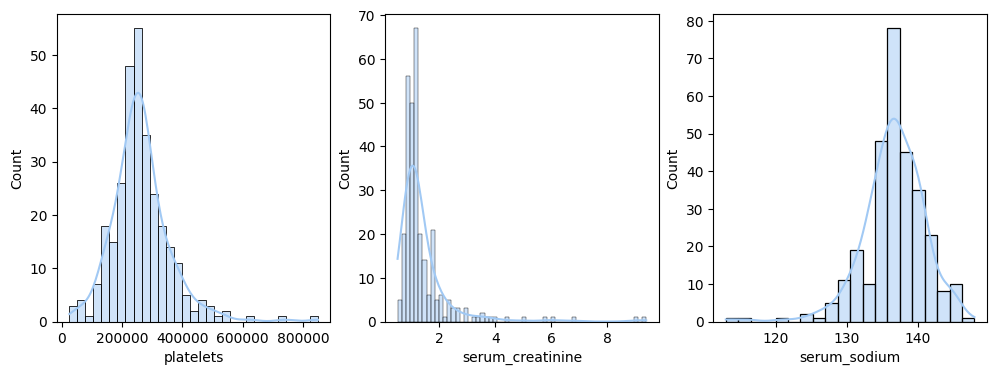

In [16]:
figure,axes = plt.subplots(1,3,figsize = [12,4])
sns.histplot(cleaned,x = 'platelets',ax = axes[0],kde=True)
sns.histplot(cleaned,x = 'serum_creatinine',ax = axes[1],kde=True)
sns.histplot(cleaned,x = 'serum_sodium',ax = axes[2],kde=True)
plt.show()

#### 分类数据分布情况

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

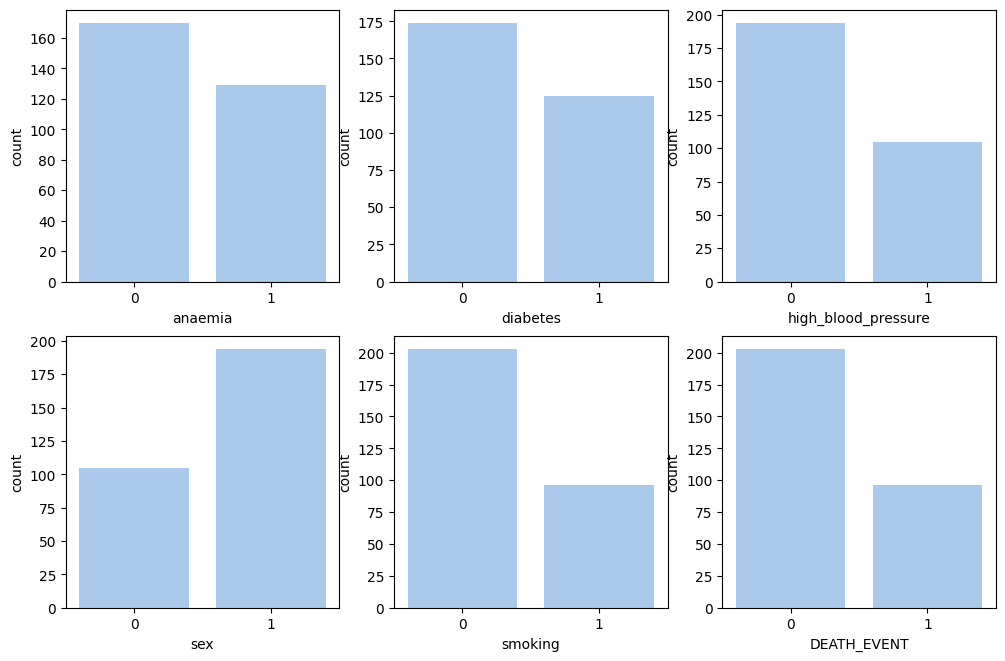

In [17]:
plt.figure(figsize = [12,12])
plt.subplot(3,3,1)
sns.countplot(cleaned,x = 'anaemia')

plt.subplot(3,3,2)
sns.countplot(cleaned,x = 'diabetes')

plt.subplot(3,3,3)
sns.countplot(cleaned,x = 'high_blood_pressure')

plt.subplot(3,3,4)
sns.countplot(cleaned,x = 'sex')

plt.subplot(3,3,5)
sns.countplot(cleaned,x = 'smoking')

plt.subplot(3,3,6)
sns.countplot(cleaned,x = 'DEATH_EVENT')

#### 数值数据两类样本的数据可视化

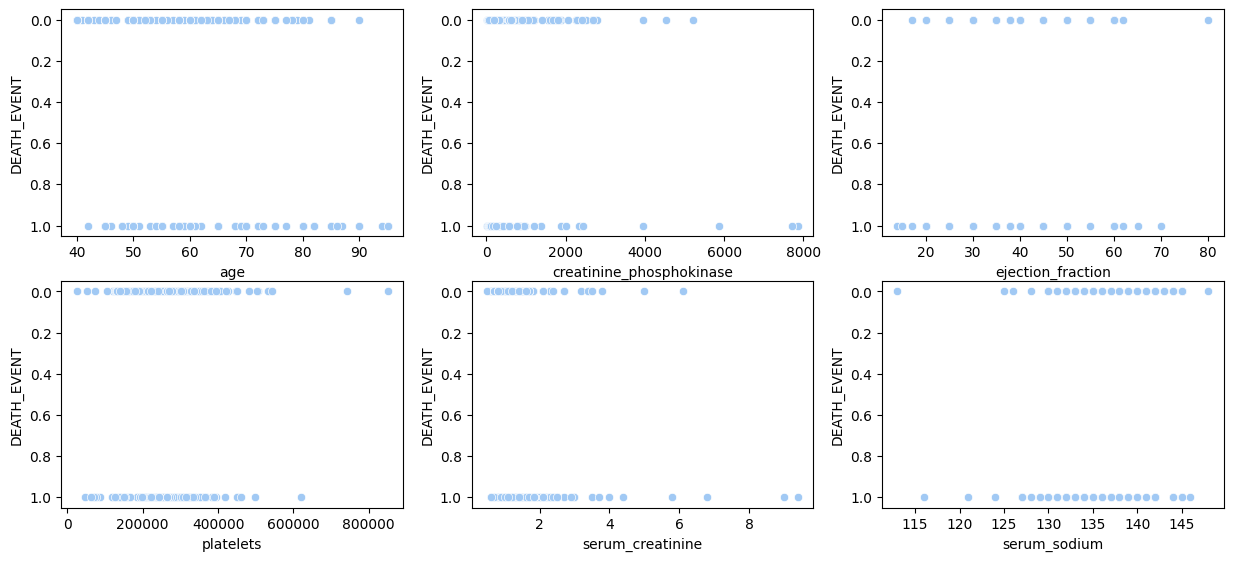

In [45]:
plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
sns.scatterplot(cleaned,x = 'age',y = 'DEATH_EVENT')

plt.subplot(3,3,2)
sns.scatterplot(cleaned,x = 'creatinine_phosphokinase',y = 'DEATH_EVENT')

plt.subplot(3,3,3)
sns.scatterplot(cleaned,x = 'ejection_fraction',y = 'DEATH_EVENT')

plt.subplot(3,3,4)
sns.scatterplot(cleaned,x = 'platelets',y = 'DEATH_EVENT')

plt.subplot(3,3,5)
sns.scatterplot(cleaned,x = 'serum_creatinine',y = 'DEATH_EVENT')

plt.subplot(3,3,6)
sns.scatterplot(cleaned,x = 'serum_sodium',y = 'DEATH_EVENT')
plt.show()

<Axes: xlabel='DEATH_EVENT', ylabel='serum_sodium'>

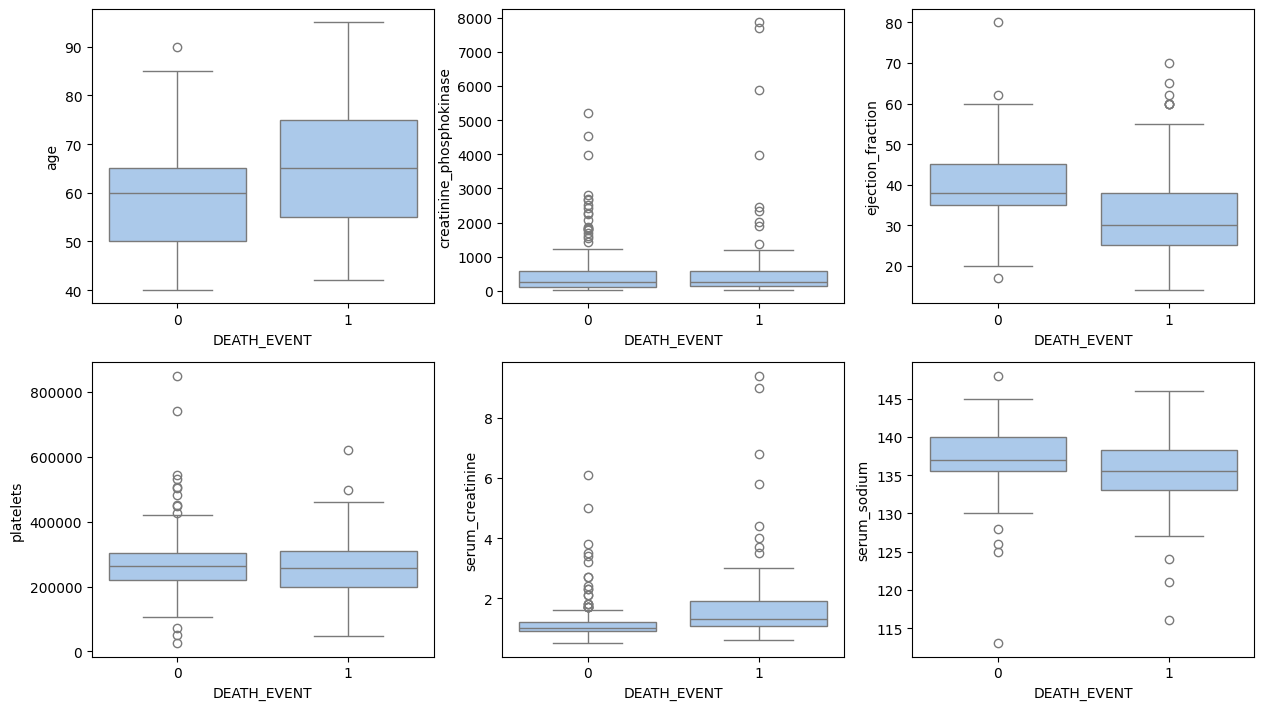

In [49]:
plt.figure(figsize = (15,13))
plt.subplot(3,3,1)
sns.boxplot(cleaned,x = 'DEATH_EVENT',y = 'age')

plt.subplot(3,3,2)
sns.boxplot(cleaned,x = 'DEATH_EVENT',y = 'creatinine_phosphokinase')

plt.subplot(3,3,3)
sns.boxplot(cleaned,x = 'DEATH_EVENT',y = 'ejection_fraction')

plt.subplot(3,3,4)
sns.boxplot(cleaned,x = 'DEATH_EVENT',y = 'platelets')

plt.subplot(3,3,5)
sns.boxplot(cleaned,x = 'DEATH_EVENT',y = 'serum_creatinine')

plt.subplot(3,3,6)
sns.boxplot(cleaned,x = 'DEATH_EVENT',y = 'serum_sodium')

根据上述箱型图和散点图可以得出以下结论：
- 年龄：未死亡样本的年龄分布大部分在80岁以下，数据较为集中。死亡样本的年龄较为分散。
- 肌氨酸酶：未死亡样本的CPK含量在0-3000左右。死亡样本的CPK高数据比例比未死亡样本高。肌酸激酶过高可能会导致肌肉无力、心律失常、心力衰竭等。
- 射血分数：未死亡样本的射血分数大部分在20以上，而死亡样本存在若干例20以下。射血分数越低，心脏泵血能力越差。
- 血小板数量：死亡样本的血小板数量高于50000的样本数小于未死亡样本。
- 血清肌酐：死亡样本的平均血清肌酐水平比未死亡样本高。肌酐高可能增加心血管疾病的风险。
- 钠水平：两组数据分布情况接近。高钠血症可能会导致心律失常、心肌功能障碍和心力衰竭等。

In [18]:
death_0 = cleaned[cleaned['DEATH_EVENT'] == 0]
death_0.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
33,50,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
38,60,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0


In [19]:
death_1 = cleaned[cleaned['DEATH_EVENT'] == 1]
death_1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


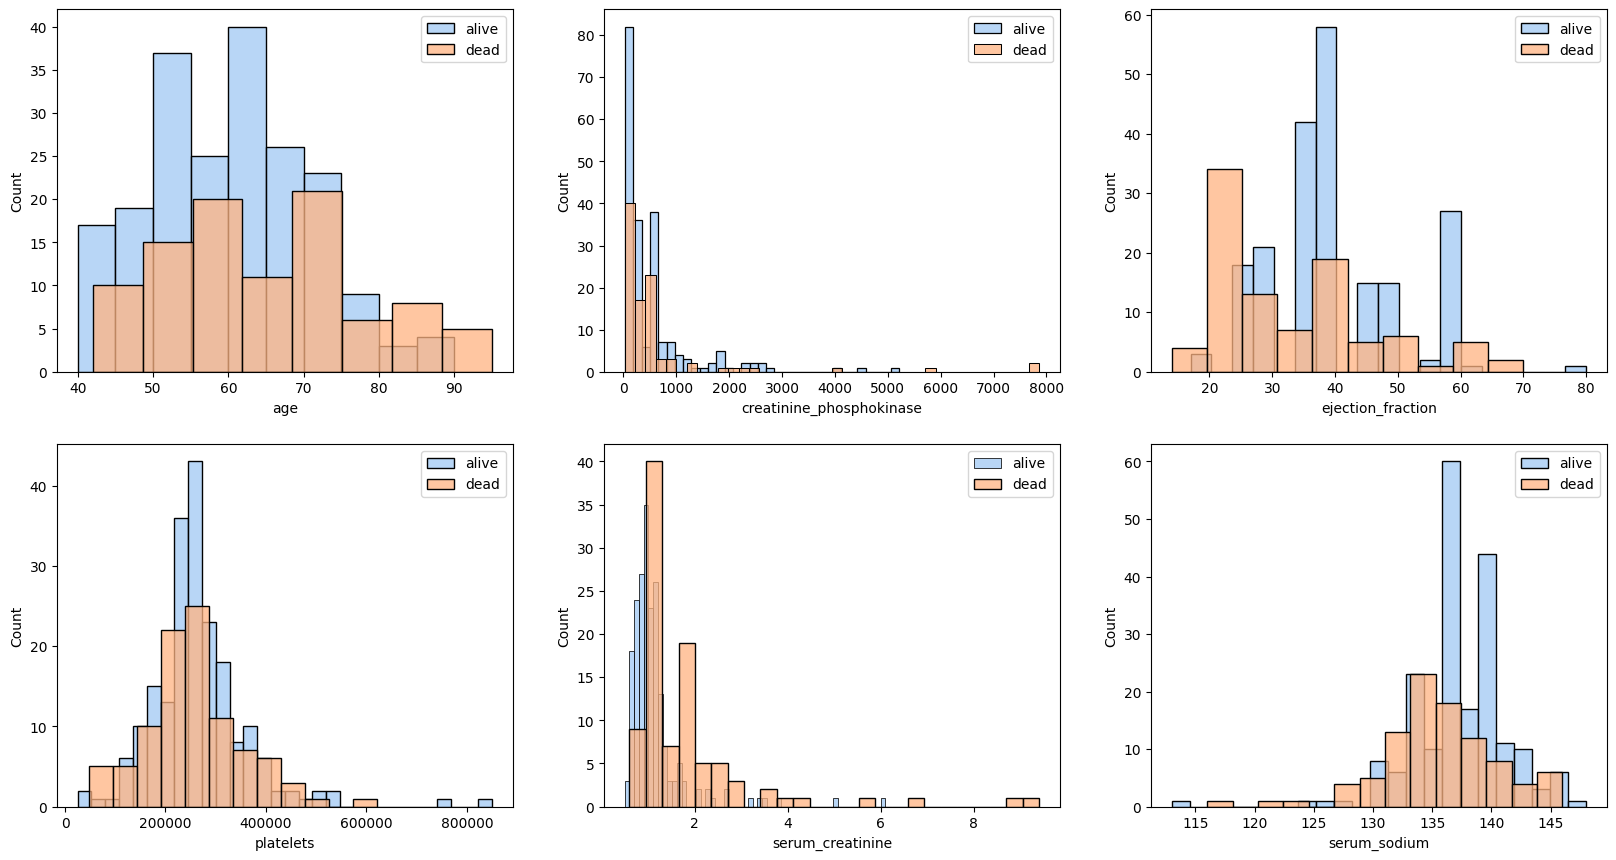

In [20]:
plt.figure(figsize = (20,16))
plt.subplot(3,3,1)
sns.histplot(death_0,x = 'age',label = 'alive')
sns.histplot(death_1,x = 'age',label = 'dead')
plt.legend()

plt.subplot(3,3,2)
sns.histplot(death_0,x = 'creatinine_phosphokinase',label = 'alive')
sns.histplot(death_1,x = 'creatinine_phosphokinase',label = 'dead')
plt.legend()

plt.subplot(3,3,3)
sns.histplot(death_0,x = 'ejection_fraction',label = 'alive')
sns.histplot(death_1,x = 'ejection_fraction',label = 'dead')
plt.legend()

plt.subplot(3,3,4)
sns.histplot(death_0,x = 'platelets',label = 'alive')
sns.histplot(death_1,x = 'platelets',label = 'dead')
plt.legend()

plt.subplot(3,3,5)
sns.histplot(death_0,x = 'serum_creatinine',label = 'alive')
sns.histplot(death_1,x = 'serum_creatinine',label = 'dead')
plt.legend()

plt.subplot(3,3,6)
sns.histplot(death_0,x = 'serum_sodium',label = 'alive')
sns.histplot(death_1,x = 'serum_sodium',label = 'dead')
plt.legend()

对比上述数值数据直方图可得到以下信息：
- 年龄：未死亡样本在50-55岁和60-65岁左右达到峰值。死亡样本在55-60岁和70-75岁达到峰值。
- 肌氨酸酶：血液中CPK水平死亡和未死亡样本的分布趋势比较接近。其中，未死亡样本出现一个小峰值。
- 射血分数：未死亡样本的射血分数普遍都在比较高的水平，死亡样本在20-25达到峰值。该因素可能是强治病因素。
- 血小板数量：两组样本之间血小板分布情况类似，趋势接近，大致呈正态分布。未死亡样本的血小板数量最大值大于死亡样本的最大值。
- 血清肌酐：死亡样本的平均血清肌酐水平比未死亡样本高，主要分布在0-4。
- 钠水平：未死亡样本的血液钠水平在136-137和140出现峰值，死亡样本在134-135出现峰值。

#### 分类数据两组样本的数据可视化

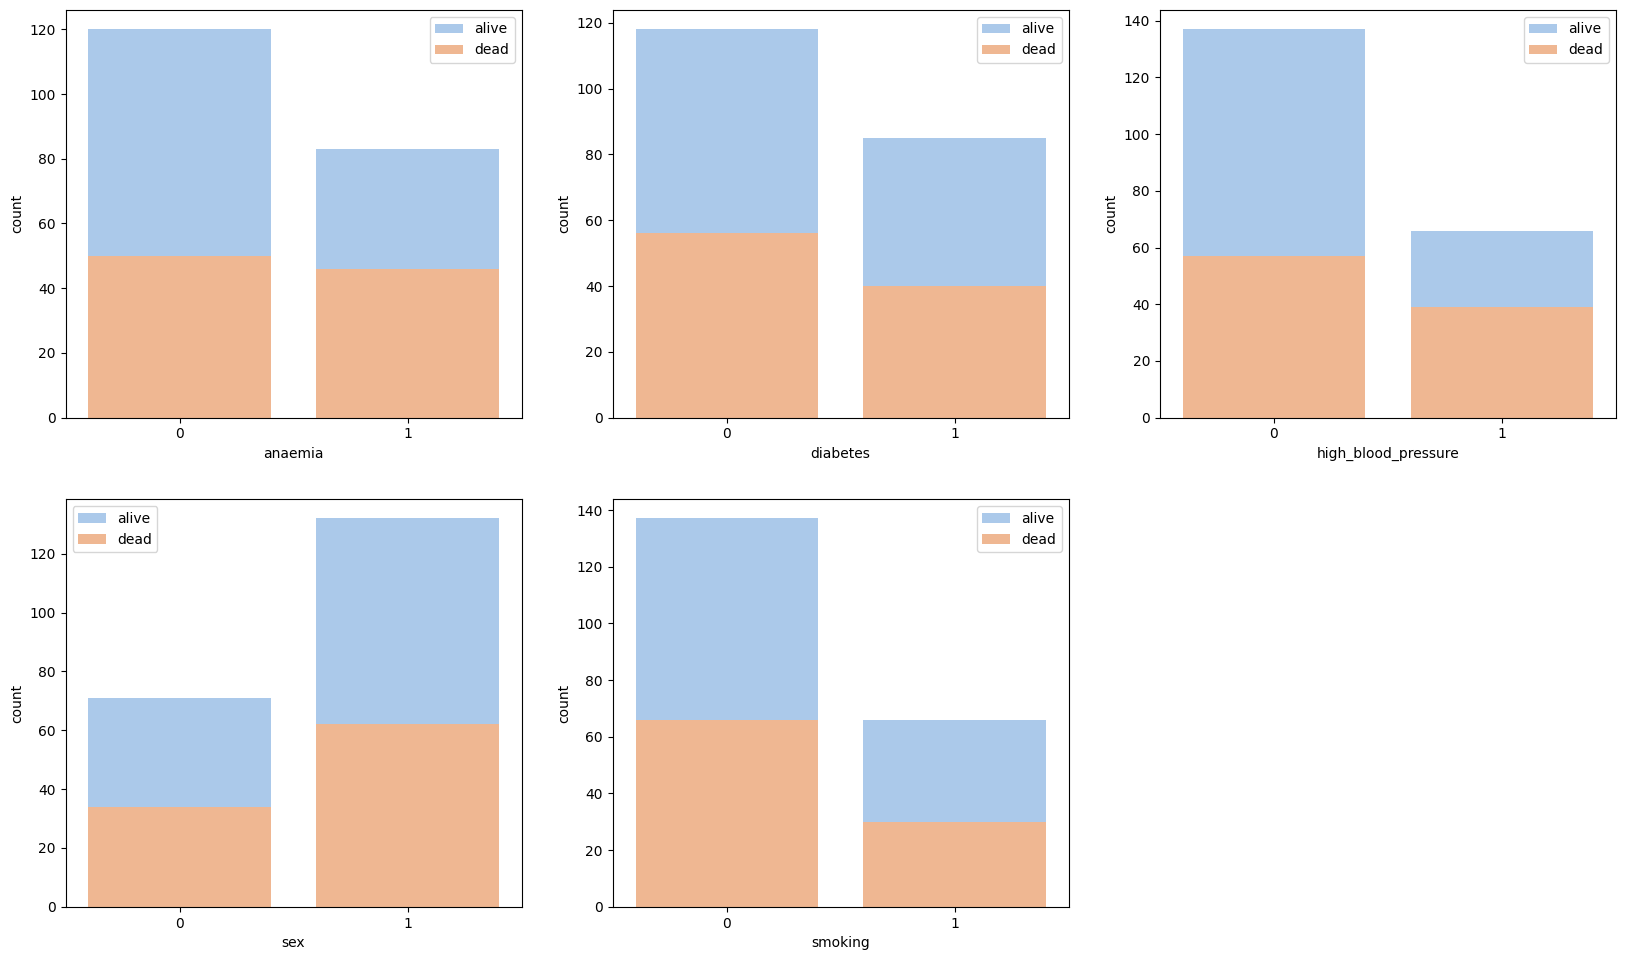

In [21]:
plt.figure(figsize = [20,18])
plt.subplot(3,3,1)
sns.countplot(death_0,x = 'anaemia',label = 'alive')
sns.countplot(death_1,x = 'anaemia',label = 'dead')
plt.legend()

plt.subplot(3,3,2)
sns.countplot(death_0,x = 'diabetes',label = 'alive')
sns.countplot(death_1,x = 'diabetes',label = 'dead')
plt.legend()

plt.subplot(3,3,3)
sns.countplot(death_0,x = 'high_blood_pressure',label = 'alive')
sns.countplot(death_1,x = 'high_blood_pressure',label = 'dead')
plt.legend()

plt.subplot(3,3,4)
sns.countplot(death_0,x = 'sex',label = 'alive')
sns.countplot(death_1,x = 'sex',label = 'dead')
plt.legend()

plt.subplot(3,3,5)
sns.countplot(death_0,x = 'smoking',label = 'alive')
sns.countplot(death_1,x = 'smoking',label = 'dead')
plt.legend()

对比上述分类数据计数图可以得到以下结论：
- 在贫血患者中，死亡率为50%以上。显著高于不贫血样本的死亡率。
- 在糖尿病患者中，死亡率约为50%。与非糖尿病患者的死亡率接近。
- 高血压患者的死亡率约为60%以上，显著高于非高血压患者的死亡率。
- 女性死亡率和男性接近，约为50%，未看出明显的性别差异。
- 是否吸烟对死亡率的影响不大。

### 保存清理后的数据

In [22]:
cleaned.to_csv('cleaned_heart_failure.csv',index = False)

### 建立逻辑回归模型

In [23]:
import statsmodels.api as sm

In [24]:
lr_cleaned = cleaned.copy()
lr_cleaned.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [25]:
## 删除不影响因变量的自变量
lr_cleaned = lr_cleaned.drop('time',axis = 1)

In [26]:
## 将分类变量转化成虚拟变量
lr_cleaned = pd.get_dummies(lr_cleaned,columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking'],dtype = int,drop_first = True)
lr_cleaned.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,75,582,20,265000.00,1.9,130,1,0,0,1,1,0
1,55,7861,38,263358.03,1.1,136,1,0,0,0,1,0
2,65,146,20,162000.00,1.3,129,1,0,0,0,1,1
3,50,111,20,210000.00,1.9,137,1,1,0,0,1,0
4,65,160,20,327000.00,2.7,116,1,1,1,0,0,0


In [27]:
## 指定自变量和因变量
y = lr_cleaned['DEATH_EVENT']
x = lr_cleaned.drop('DEATH_EVENT',axis = 1)

In [28]:
## 检查自变量之间的相关性
x.corr().abs() 

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
age,1.000000,0.081672,0.060049,0.052294,0.159161,0.045992,0.088222,0.100791,0.093347,0.065371,0.018539
creatinine_phosphokinase,0.081672,1.000000,0.044080,0.024463,0.016408,0.059550,0.190741,0.009639,0.070590,0.079791,0.002421
ejection_fraction,0.060049,0.044080,1.000000,0.072177,0.011302,0.175902,0.031557,0.004850,0.024445,0.148386,0.067315
platelets,0.052294,0.024463,0.072177,1.000000,0.041198,0.062125,0.043786,0.092193,0.049963,0.125120,0.028234
serum_creatinine,0.159161,0.016408,0.011302,0.041198,1.000000,0.189095,0.052174,0.046975,0.004935,0.006970,0.027414
serum_sodium,0.045992,0.059550,0.175902,0.062125,0.189095,1.000000,0.041882,0.089551,0.037109,0.027566,0.004813
anaemia_1,0.088222,0.190741,0.031557,0.043786,0.052174,0.041882,1.000000,0.012729,0.038182,0.094769,0.107290
diabetes_1,0.100791,0.009639,0.004850,0.092193,0.046975,0.089551,0.012729,1.000000,0.012732,0.157730,0.147173
high_blood_pressure_1,0.093347,0.070590,0.024445,0.049963,0.004935,0.037109,0.038182,0.012732,1.000000,0.104615,0.055711
sex_1,0.065371,0.079791,0.148386,0.125120,0.006970,0.027566,0.094769,0.157730,0.104615,1.000000,0.445892


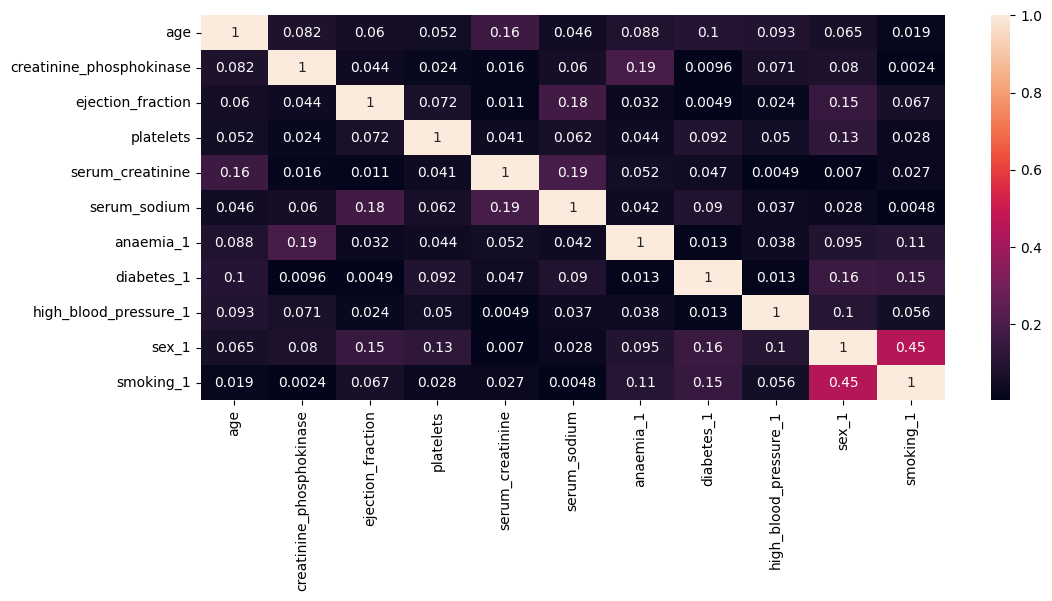

In [29]:
plt.subplots(1, 1, figsize=[12, 5])
sns.heatmap(x.corr().abs(), annot = True)
plt.show()

In [30]:
## 计算截距
x = sm.add_constant(x)
x

,const,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,1.0,75,582,20,265000.00,1.9,130,0,0,1,1,0
1,1.0,55,7861,38,263358.03,1.1,136,0,0,0,1,0
2,1.0,65,146,20,162000.00,1.3,129,0,0,0,1,1
3,1.0,50,111,20,210000.00,1.9,137,1,0,0,1,0
4,1.0,65,160,20,327000.00,2.7,116,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,62,61,38,155000.00,1.1,143,0,1,1,1,1
295,1.0,55,1820,38,270000.00,1.2,139,0,0,0,0,0
296,1.0,45,2060,60,742000.00,0.8,138,0,1,0,0,0
297,1.0,45,2413,38,140000.00,1.4,140,0,0,0,1,1


In [31]:
## 建立回归模型
model = sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.492091
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Wed, 27 Aug 2025   Pseudo R-squ.:                  0.2160
Time:                        08:52:04   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.126e-13
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.9633      4.601      1.079      0.281      -4.055      13.982
age                          0.0557      0.013      4.241      0.000       0.030       0.081
creatinine_phosphokinase     0.0003      0.000      2.035      0.042    1.07e-05       0.001
ejection_fraction           -0.0703      0.015     -4.731      0.000      -0.099      -0.041
platelets                -7.102e-07   1.62e-06     -0.439      0.660   -3.88e-06    2.46e-06
serum_creatinine             0.6619      0.173      3.817      0.000       0.322       1.002
serum_sodium                -0.0567      0.033     -1.698      0.090      -0.122       0.009
anaemia_1                    0.4176      0.301      1.388      0.165      -0.172       1.007
diabetes_1                   0.1511      0.297      0.508      0.611      -0.432       0.734
high_blood_pressure_1        0.4189      0.306      1.368      0.171      -0.181       1.019
sex_1                       -0.3992      0.351     -1.138      0.255      -1.087       0.288
smoking_1                    0.1358      0.349      0.390      0.697      -0.547       0.819
============================================================================================
"""

In [32]:
## 设置显著水平为0.05，删除p值大于0.05的自变量
x = x.drop(['const','platelets','serum_sodium','anaemia_1','diabetes_1','high_blood_pressure_1','sex_1','smoking_1'],axis = 1)

In [33]:
## 检查自变量之间的相关性
x.corr().abs() > 0.8

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine
age,True,False,False,False
creatinine_phosphokinase,False,True,False,False
ejection_fraction,False,False,True,False
serum_creatinine,False,False,False,True


In [34]:
## 建立回归模型
model = sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.522583
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 Aug 2025   Pseudo R-squ.:                  0.1674
Time:                        08:52:04   Log-Likelihood:                -156.25
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.450e-13
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                          0.0251      0.008      3.304      0.001       0.010       0.040
creatinine_phosphokinase     0.0001      0.000      0.946      0.344      -0.000       0.000
ejection_fraction           -0.0877      0.013     -6.520      0.000      -0.114      -0.061
serum_creatinine             0.6059      0.148      4.089      0.000       0.315       0.896
============================================================================================
"""

#### 模型认为，自变量因素的增加对因变量的影响如下：

In [35]:
## 年龄
np.exp(0.0251)

np.float64(1.0254176571632279)

In [36]:
## 血液CPK水平
np.exp(0.0001)

np.float64(1.0001000050001667)

In [37]:
## 射血分数
np.exp(-0.0877)

np.float64(0.9160356461997033)

In [38]:
## 血清肌酐
np.exp(0.6059)

np.float64(1.8329010777534622)

以上数据表明：
- 年龄增长一岁，死亡率是原先的1.025倍。
- 血液CPK水平增加1，死亡率提升0.01%，属于弱影响因素。
- 射血分数增加1，死亡率降低9.4%。
- 血清肌酐水平增大1，死亡率增加83.3%，属于强影响因素。